In [77]:
#Odevler Colab uzerinden yapilmistir 
#Abdullah Kılıçaslan   2018280085

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rd
import matplotlib.pyplot as plt
from math import sqrt
from scipy.sparse import*




In [87]:
# csv verilerinin alınması 
data= pd.read_csv("/Final-data.csv")
data

,a1,a2,a3,a4,a5,a6,a7,a8,a9
0,1.5210,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.5176,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.5162,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.5177,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.5174,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.5162,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.5169,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.5207,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.5165,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


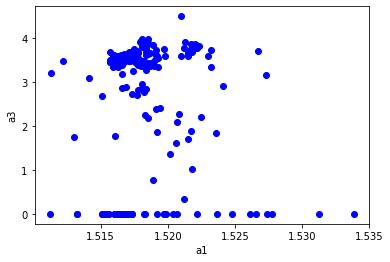

In [89]:
#Veri görsellestirme icin 2 deger giriyorum x ekseni a1 sectim y eksenini a3
X = data[["a1", "a3"]]

plt.scatter(X["a1"], X["a3"], c="blue")
plt.xlabel("a1")
plt.ylabel("a3")
plt.show()

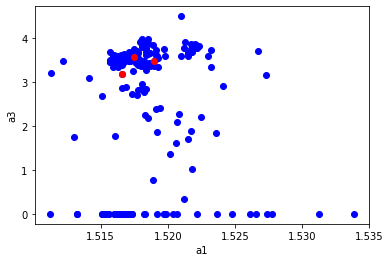

In [90]:
# küme sayısının secilmesi K degiskeni degistirelerek yapılabilir k = 3 icin 3 merkez atıyor 
K=3

Centroids = (X.sample(n=K))
plt.scatter(X["a1"], X["a3"], c="blue")
plt.scatter(Centroids["a1"], Centroids["a3"], c="red")
plt.xlabel("a1")
plt.ylabel("a3")
plt.show()


In [92]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["a1"]-row_d["a1"])**2
            d2 = (row_c["a3"]-row_d["a3"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["a1", "a3"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['a3'] - Centroids['a3']).sum() + (Centroids_new['a1'] - Centroids['a1']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["a3","a1"]]

<ipython-input-92-3eb09039df45>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-92-3eb09039df45>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-0.7432020244889905
-0.351471401299515
-0.49744394165656936
-0.46137905975788956
-0.18809333195671799
-0.029541944832945033
0.0


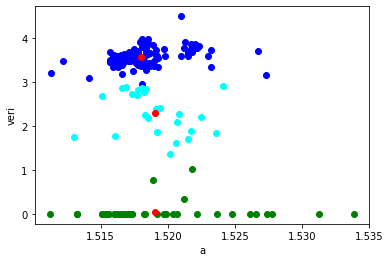

In [93]:
#Görselleşmiş verinin renkleri satır ve sütun adı aynı zamanda tüm verilerin döndürülmesi
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["a1"],data["a3"],c=color[k])
plt.scatter(Centroids["a1"],Centroids["a3"],c='red')
plt.xlabel('a')
plt.ylabel('veri')
plt.show()